In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2
%matplotlib inline

In [2]:
TRAIN_DATA_PATH = "augmented" 

NUM_OF_WORDS = 5 # "A" to "Z" 
IMAGE_SIZE = 50 #We'll be workign with 50 * 50 pixel images
NUM_OF_CHANNELS = 1 # Grayscale
NUM_OF_DENSE_LAYER_NODES = (IMAGE_SIZE * IMAGE_SIZE) // 2

LABELS = ['hello','thanks','yes','sorry','iloveyou']
print(len(LABELS))

5


In [3]:
#appending image of each type in list
y_unique = []
x_unique = []
for alphabet in os.listdir(TRAIN_DATA_PATH):
    for image in os.listdir(TRAIN_DATA_PATH+str('\\')+alphabet):
        X=imread(TRAIN_DATA_PATH+str('\\')+alphabet+str('\\')+image)
        x_unique.append(X)
        y_unique.append(alphabet)
        break

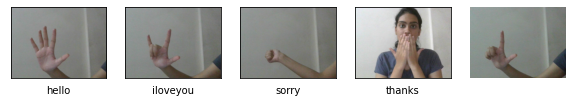

In [4]:
fig=plt.figure(figsize=(12,12))
for i in range(len(x_unique)):
    ax=fig.add_subplot(6,6,i+1)
    ax.imshow(x_unique[i])
    plt.xlabel(y_unique[i])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()
fig.savefig('alphabet')

In [5]:
def create_data(DATA_PATH):
    x=[]
    y=[]
    paths=[]
    for label in LABELS:
        path = os.path.join(DATA_PATH, label)
        label_name = LABELS.index(label)
        for img in os.listdir(path):
            p=os.path.join(path, img)
            paths.append(p)
            print(p)
            try:
                img_array = cv2.imread(p)#os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                x.append(img_array)
                y.append(label_name)
            except Exception as e:
                pass
    return x,y

X_train, y_train= create_data(TRAIN_DATA_PATH)


augmented\hello\hello_1.jpg
augmented\hello\hello_10.jpg
augmented\hello\hello_10_0.jpg
augmented\hello\hello_10_1.jpg
augmented\hello\hello_10_2.jpg
augmented\hello\hello_10_3.jpg
augmented\hello\hello_10_4.jpg
augmented\hello\hello_11.jpg
augmented\hello\hello_11_0.jpg
augmented\hello\hello_11_1.jpg
augmented\hello\hello_11_2.jpg
augmented\hello\hello_11_3.jpg
augmented\hello\hello_11_4.jpg
augmented\hello\hello_12.jpg
augmented\hello\hello_12_0.jpg
augmented\hello\hello_12_1.jpg
augmented\hello\hello_12_2.jpg
augmented\hello\hello_12_3.jpg
augmented\hello\hello_12_4.jpg
augmented\hello\hello_13.jpg
augmented\hello\hello_13_0.jpg
augmented\hello\hello_13_1.jpg
augmented\hello\hello_13_2.jpg
augmented\hello\hello_13_3.jpg
augmented\hello\hello_13_4.jpg
augmented\hello\hello_14.jpg
augmented\hello\hello_14_0.jpg
augmented\hello\hello_14_1.jpg
augmented\hello\hello_14_2.jpg
augmented\hello\hello_14_3.jpg
augmented\hello\hello_14_4.jpg
augmented\hello\hello_15.jpg
augmented\hello\hello_1

In [6]:
NUM_OF_TRAIN_IMAGES = len(X_train)
print(len(X_train))

1800


In [7]:
X_train=np.array(X_train)

In [8]:
X_train = X_train.reshape(NUM_OF_TRAIN_IMAGES, IMAGE_SIZE , IMAGE_SIZE, NUM_OF_CHANNELS)
print(X_train.shape)

(1800, 50, 50, 1)


In [9]:
X_train = X_train.astype("float32")
X_train /= 255.0


In [10]:
y_train = to_categorical(y_train, NUM_OF_WORDS)
print(X_train.shape)


(1800, 50, 50, 1)


In [11]:
#Saving Data
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)

In [12]:
X_train=np.load("X_train.npy")
y_train=np.load("y_train.npy")

# Creating CNN Model

In [13]:
model = Sequential()

model.add(Conv2D(IMAGE_SIZE, (3, 3), padding = "same", input_shape = (IMAGE_SIZE, IMAGE_SIZE, NUM_OF_CHANNELS), activation = "relu"))
model.add(Conv2D(IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(NUM_OF_DENSE_LAYER_NODES, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_WORDS, activation = "softmax"))

# Compiling CNN Model

In [14]:
import tensorflow as tf
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 50)        500       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 50)        22550     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 50)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 50)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 100)       45100     
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 100)       90100     
                                                        

# Training Model

In [30]:
# history = model.fit(
#     X_train, 
#     y_train, 
#     batch_size = 52,
#     epochs = 5,
#     shuffle = True
# )
# EPOCHS = 8
# BATCH_SIZE = 128
history = model.fit(X_train, 
    y_train, 
    batch_size =128,
    epochs = 16,
    shuffle = True
                    )

Epoch 1/16


C:\Users\SADNYANI\anaconda3\envs\sadnyani\lib\site-packages\keras\backend.py:5532: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "categorical_crossentropy"


15/15 [==============================] - 24s 2s/step - loss: 0.0193 - accuracy: 0.9944
Epoch 2/16
15/15 [==============================] - 23s 1s/step - loss: 0.0178 - accuracy: 0.9961
Epoch 3/16
15/15 [==============================] - 22s 1s/step - loss: 0.0100 - accuracy: 0.9961
Epoch 4/16
15/15 [==============================] - 22s 1s/step - loss: 0.0155 - accuracy: 0.9972
Epoch 5/16
15/15 [==============================] - 22s 1s/step - loss: 0.0079 - accuracy: 0.9967
Epoch 6/16
15/15 [==============================] - 22s 1s/step - loss: 0.0130 - accuracy: 0.9961
Epoch 7/16
15/15 [==============================] - 22s 1s/step - loss: 0.0072 - accuracy: 0.9972
Epoch 8/16
15/15 [==============================] - 22s 1s/step - loss: 0.0048 - accuracy: 0.9989
Epoch 9/16
15/15 [==============================] - 23s 2s/step - loss: 0.0069 - accuracy: 0.9983
Epoch 10/16
15/15 [==============================] - 22s 1s/step - loss: 0.0079 - accuracy: 0.9983
Epoch 11/16
15/15 [===========

In [16]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['loss'])
# plt.title("Accuracy Graph")
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.legend(['accuracy','loss'])
# plt.show()

# Saving Model for future use

In [19]:
#Saving Model
from keras.models import load_model
model.save('model.h5') 

In [17]:
IMAGE_SIZE = 50  # We'll be working with 50 * 50 pixel images
MODEL_PATH = "model.h5"

LABELS = ['hello','thanks','yes','sorry','iloveyou']

# Minimum confidence percentage i.e allowed for prediction
THRESHOLD = 25

In [18]:
import cv2
import numpy as np
from variables import *
from keras.models import load_model


# Loads pretrained CNN Model from MODEL_PATH
model = load_model('model.h5')


def pre_process(img_array):
    """
    :param img_array: image converted to np array
    :return:  img_array after pre-processing(converting to grayscale, resizing, normalizing) the  array
    """
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    img_array = cv2.resize(img_array, (50, 50))
    # Reshape array to l * w * channels
    img_array = img_array.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)

    # Normalize the array
    img_array = img_array / 255.0

    # Expand Dimension of the array as our model expects a 4D array
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


def which(img_array):
    """
    :param img_array: np array of image which is to be predicted
    :return: confidence precentage and predicted letter
    """
    img_array = pre_process(img_array)
    preds = model.predict(img_array)
    preds *= 100
    most_likely_class_index = int(np.argmax(preds))
    return preds.max(), LABELS[most_likely_class_index]


In [19]:
# pip install pyttsx3
# !pip install variables
# !pip3 install predict

In [20]:
"""
Contains functions : pre_process() and which() that are needed by translator.py for predicting image from webcam
"""
import cv2
import numpy as np
from variables import *
from keras.models import load_model


# Loads pretrained CNN Model from MODEL_PATH
model = load_model("model.h5")


def pre_process(img_array):
    """
    :param img_array: image converted to np array
    :return:  img_array after pre-processing(converting to grayscale, resizing, normalizing) the  array
    """
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    img_array = cv2.resize(img_array, (50, 50))
    # Reshape array to l * w * channels
    img_array = img_array.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)

    # Normalize the array
    img_array = img_array / 255.0

    # Expand Dimension of the array as our model expects a 4D array
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


def which(img_array):
    """
    :param img_array: np array of image which is to be predicted
    :return: confidence precentage and predicted letter
    """
    img_array = pre_process(img_array)
    preds = model.predict(img_array)
    preds *= 100
    most_likely_class_index = int(np.argmax(preds))
    return preds.max(), LABELS[most_likely_class_index]

In [21]:
# img_raw = cv2.imread('hello_1.jpg')
# conf, label = which(hand_bg_rm)
# print(img_raw)

In [ ]:
import pyttsx3
import time
# from predict import *


# Initialise Text to speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 105)
engine.setProperty('voice', 1)
arr=[]
window_name = "ASL"
frame_height, frame_width, roi_height, roi_width = 480, 900, 200, 200
cap = cv2.VideoCapture(0)
cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
x_start, y_start = 100, 100
sentence = ""
while True:
    ret, frame = cap.read()
    if ret is None:
        print("No Frame Captured")
        continue
    cv2.rectangle(frame, (x_start, y_start), (x_start + roi_width, y_start + roi_height), (255, 0, 0),3)  
    img1 = frame[y_start: y_start + roi_height, x_start: x_start + roi_width]
#     img1 = 'hello_1.jpg'
    img_ycrcb = cv2.cvtColor(img1, cv2.COLOR_BGR2YCR_CB)
#     img_ycrcb = 'hello_1.jpg'
    blur = cv2.GaussianBlur(img_ycrcb, (11, 11), 0)
     # lower  and upper skin color
    skin_ycrcb_min = np.array((0, 100, 50))
    skin_ycrcb_max = np.array((255, 255, 255))
    mask = cv2.inRange(blur, skin_ycrcb_min, skin_ycrcb_max)  # detecting the hand in the bounding box
    kernel = np.ones((2, 2), dtype=np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=1)
    naya = cv2.bitwise_and(img1, img1, mask=mask)
    cv2.imshow("mask", mask)
    cv2.imshow("naya", naya)
    hand_bg_rm = naya
    hand = img1
    c = cv2.waitKey(1) & 0xff
    # if len(sentence) > 0 and c == ord('s'):
#     engine.say(sentence)
#     engine.runAndWait()
# # Clear the sentence
# if c == ord('c') or c == ord('C'):
#     sentence = ""
# # Delete the last character
# if c == ord('d') or c == ord('D'):
#     sentence = sentence[:-1]

# # Put Space between words
# if c == ord('m') or c == ord('M'):
#     sentence += " "

# If  valid hand area is cropped









    if hand.shape[0] != 0 and hand.shape[1] != 0:
        conf, label = which(hand_bg_rm)
        if conf >= THRESHOLD:
            cv2.putText(frame, label, (50, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, .7, (0, 0, 255))
#             engine.say(label)
            print(label)
            engine.runAndWait()
            #time.sleep(0.5)
        if c == ord('n') or c == ord('N'):
            sentence += label
    cv2.putText(frame, sentence, (50, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, .7, (0, 0, 255))
    cv2.imshow(window_name, frame)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 1s 595ms/step
sorry
1/1 [==============================] - 0s 98ms/step
hello
1/1 [==============================] - 0s 58ms/step
hello
1/1 [==============================] - 0s 72ms/step
hello
1/1 [==============================] - 0s 79ms/step
hello
1/1 [==============================] - 0s 75ms/step
hello
1/1 [==============================] - 0s 75ms/step
hello
1/1 [==============================] - 0s 68ms/step
hello
1/1 [==============================] - 0s 56ms/step
hello
1/1 [==============================] - 0s 57ms/step
sorry
1/1 [==============================] - 0s 97ms/step
sorry
1/1 [==============================] - 0s 33ms/step
sorry
1/1 [==============================] - 0s 63ms/step
sorry
1/1 [==============================] - 0s 36ms/step
sorry
1/1 [==============================] - 0s 92ms/step
sorry
1/1 [==============================] - 0s 94ms/step
sorry
1/1 [==============================] - 0s 33ms/step
sorry
1/1 [========